Extracting Video Game Listings from LaunchBox's XML Metadata

In [1]:
from datetime import datetime
import xml.etree.ElementTree as ET
import pandas as pd
import re
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# read in the data
videogames_xml = ET.parse('Metadata.xml')
root_xml = videogames_xml.getroot()

In [3]:
# Video Game attributes to extract
videogame_attrs = ["Name", "ReleaseDate", "ReleaseYear", "Developer", "Platform",
	 "Genres", "Publisher", "MaxPlayers", "ESRB", "Overview", "Cooperative"]

# store list to keep video game data
rows = []

In [4]:
# loop through each game tag and for each game, get the data per
# videogame_attrs and store in a dictionary and then at the end,
# store in the rows list.
for game in root_xml.findall('Game'):
	data = [] # store game data
	# loop through each attribute
	for field in videogame_attrs:
		if game is not None and game.find(field) is not None:
			data.append(game.find(field).text) # append the data
		else:
			data.append(None) # data not found, just set to None
	rows.append({videogame_attrs[i]: data[i] # put the game data in the list
			  for i in range(0, len(videogame_attrs))})

# Take all the games and their data and put in a dataset/dataframe
games = pd.DataFrame(rows, columns = videogame_attrs)

In [5]:
# There are time/timezones in the 'ReleaseDate' column starting with 'T'
# remove them and just keep the data
dates = [re.sub("T.*", "", date)
		 if date is not None else None
		 for date in games["ReleaseDate"]]

# format the Date as well for sorting purposes
dates = [datetime.strptime(date, "%Y-%m-%d") 
		 if date is not None else None
		 for date in dates]

games["ReleaseDate"] = dates

In [6]:
# save dataframe in a csv file
games.to_csv("games.csv", index=False)

In [7]:
# All Megaman games
megaman_games = games[games["Name"].str.contains("Megaman|Mega Man", case=False, na=False)]
megaman_games[["Name", "ReleaseDate", "Publisher", "Platform"]].sort_values("ReleaseDate")

,Name,ReleaseDate,Publisher,Platform
13885,Megamania,1983-06-01,Activision,Atari 5200
54631,Mega Man,1987-12-17,Capcom,Nintendo Entertainment System
54632,Mega Man 2,1988-12-24,Capcom,Nintendo Entertainment System
41567,Mega Man,1990-05-01,Hi-Tech Expressions,MS-DOS
54633,Mega Man 3,1990-09-28,Nintendo,Nintendo Entertainment System
...,...,...,...,...
44457,Mega Man Battle: The Last Fight,NaT,None,MUGEN
44458,Mega Man: Robot Master Mayhem,NaT,Infinity Mugen Team,MUGEN
58307,Megaman Battle Network 7 Lost Dimension,NaT,None,Nintendo Game Boy Advance
99863,Mega Man Perfect Blue,NaT,RRThiel,Windows


In [8]:
# Every Konami game sorted by ReleaseDate and show ESRB ratings
konami_games = games[games["Developer"].str.contains("Konami", case=False, na=False)]
konami_games[["Name", "ReleaseDate", "ReleaseYear", "ESRB"]].sort_values("ReleaseDate")

,Name,ReleaseDate,ReleaseYear,ESRB
12108,The End,1980-11-01,None,Not Rated
34030,Super Cobra,1981-03-01,None,None
11753,Super Cobra,1981-06-22,None,None
12443,Turtles,1981-10-01,None,Not Rated
16639,Amidar,1982-01-01,None,Not Rated
...,...,...,...,...
90059,Futbol Colombiano 96,NaT,1998,E10+ - Everyone 10+
91780,Valve Limit R,NaT,2005,None
91861,Frogger,NaT,1983,None
91914,Frogger,NaT,1983,Not Rated


In [9]:
# List of SEGA Genesis games and see which were the last ones
SEGA_games = games[games["Platform"].str.contains("Genesis", case=False, na=False)]
SEGA_games = SEGA_games[SEGA_games["ReleaseDate"] < "1999-01-01"]
SEGA_games[["Name", "ReleaseDate", "Platform", "Developer", "Publisher"]].sort_values(by="ReleaseDate").tail(n=25)

,Name,ReleaseDate,Platform,Developer,Publisher
68161,Brian Lara Cricket 96,1996-05-17,Sega Genesis,Audiogenic Software,Codemasters
68170,Bugs Bunny in Double Trouble,1996-06-01,Sega Genesis,ATOD AB,Sega
69134,Ultimate Mortal Kombat 3,1996-06-26,Sega Genesis,Williams,Midway
68112,Bass Masters Classic: Pro Edition,1996-07-01,Sega Genesis,Black Pearl,Black Pearl
69206,Worms,1996-08-08,Sega Genesis,East Point Software,Ocean
68933,Spirou,1996-09-20,Sega Genesis,Infogrames,Infogrames
68669,NHL 97,1996-09-24,Sega Genesis,High Score Productions,EA Sports
68355,Ferias Frustradas do Pica Pau,1996-10-01,Sega Genesis,Tectoy,TecToy
68602,Micro Machines Military: It's A Blast!,1996-10-14,Sega Genesis,Supersonic Software,Codemasters
68642,NBA Hang Time,1996-10-23,Sega Genesis,Funcom,Midway


According to the data, "Duke Nukem 3D" was the last game that was released for the Sega Genesis.

Doing further research, it seems "Frogger" was the last game ever created for the Genesis.

The game is similar to the original Frogger many years ago.

In [10]:
# Get number of Playstation games for each Playstation system
playstation_games_per_system = games[games["Platform"].str.contains("Playstation|psp", case=False, na=False)]
playstation_games_per_system = playstation_games_per_system.groupby(['Platform']).count()
playstation_games_per_system["Name"]

Platform
Sony PSP                 1790
Sony PSP Minis            310
Sony Playstation         4314
Sony Playstation 2       3302
Sony Playstation 3       2230
Sony Playstation 4       1015
Sony Playstation Vita     474
Name: Name, dtype: int64

In [11]:
# Get number of Nintendo games for each Nintendo system
nintendo_games_per_system = games[games["Platform"].str.contains("Nintendo", case=False, na=False)]
nintendo_games_per_system = nintendo_games_per_system.groupby(['Platform']).count()
nintendo_games_per_system["Name"]

Platform
Nintendo 3DS                           1310
Nintendo 64                             449
Nintendo 64DD                            13
Nintendo DS                            3906
Nintendo Entertainment System          2189
Nintendo Famicom Disk System            257
Nintendo Game & Watch                   210
Nintendo Game Boy                      1200
Nintendo Game Boy Advance              1929
Nintendo Game Boy Color                1025
Nintendo GameCube                       713
Nintendo Pokemon Mini                    14
Nintendo Satellaview                    181
Nintendo Switch                        1367
Nintendo Virtual Boy                     34
Nintendo Wii                           2119
Nintendo Wii U                          514
Super Nintendo Entertainment System    2106
Name: Name, dtype: int64

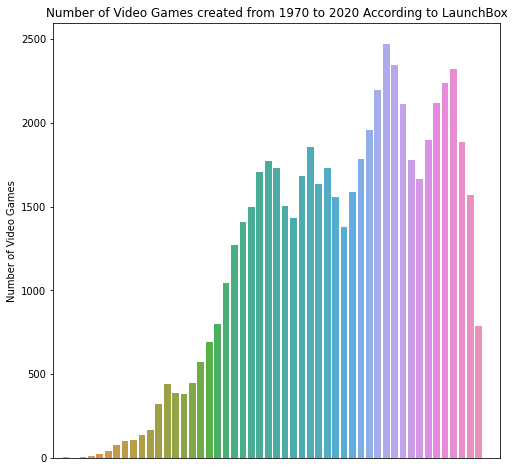

In [12]:
#Show visually how many games have been created over time by year

# get the year of each game
n_games_by_year = games.groupby(games["ReleaseDate"].dt.strftime('%Y'))["Name"].count().\
reset_index(name="total_games")

# Make a bar plot of year vs number of games made
plt.figure(figsize=(8,8))
g = sb.barplot(x="ReleaseDate", y="total_games", data=n_games_by_year)
g.set(title="Number of Video Games created from 1970 to 2020 According to LaunchBox")
g.set(xlabel=None, ylabel="Number of Video Games")
g.set(xticklabels=[], xticks=[])
plt.show()